### Задача 2
Використовуючи дані із файлу petrol_consumption.csv побудуйте модель множинної регресії для знаходження залежності між значеннями споживання бензину і похідними факторами. Оцініть якість отриманої регресії.


### Рішення

In [39]:
import pandas as pd
import numpy as np
import sklearn
import openpyxl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
import seaborn as sb

In [3]:
df=pd.read_csv('petrol_consumption.csv')
df

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


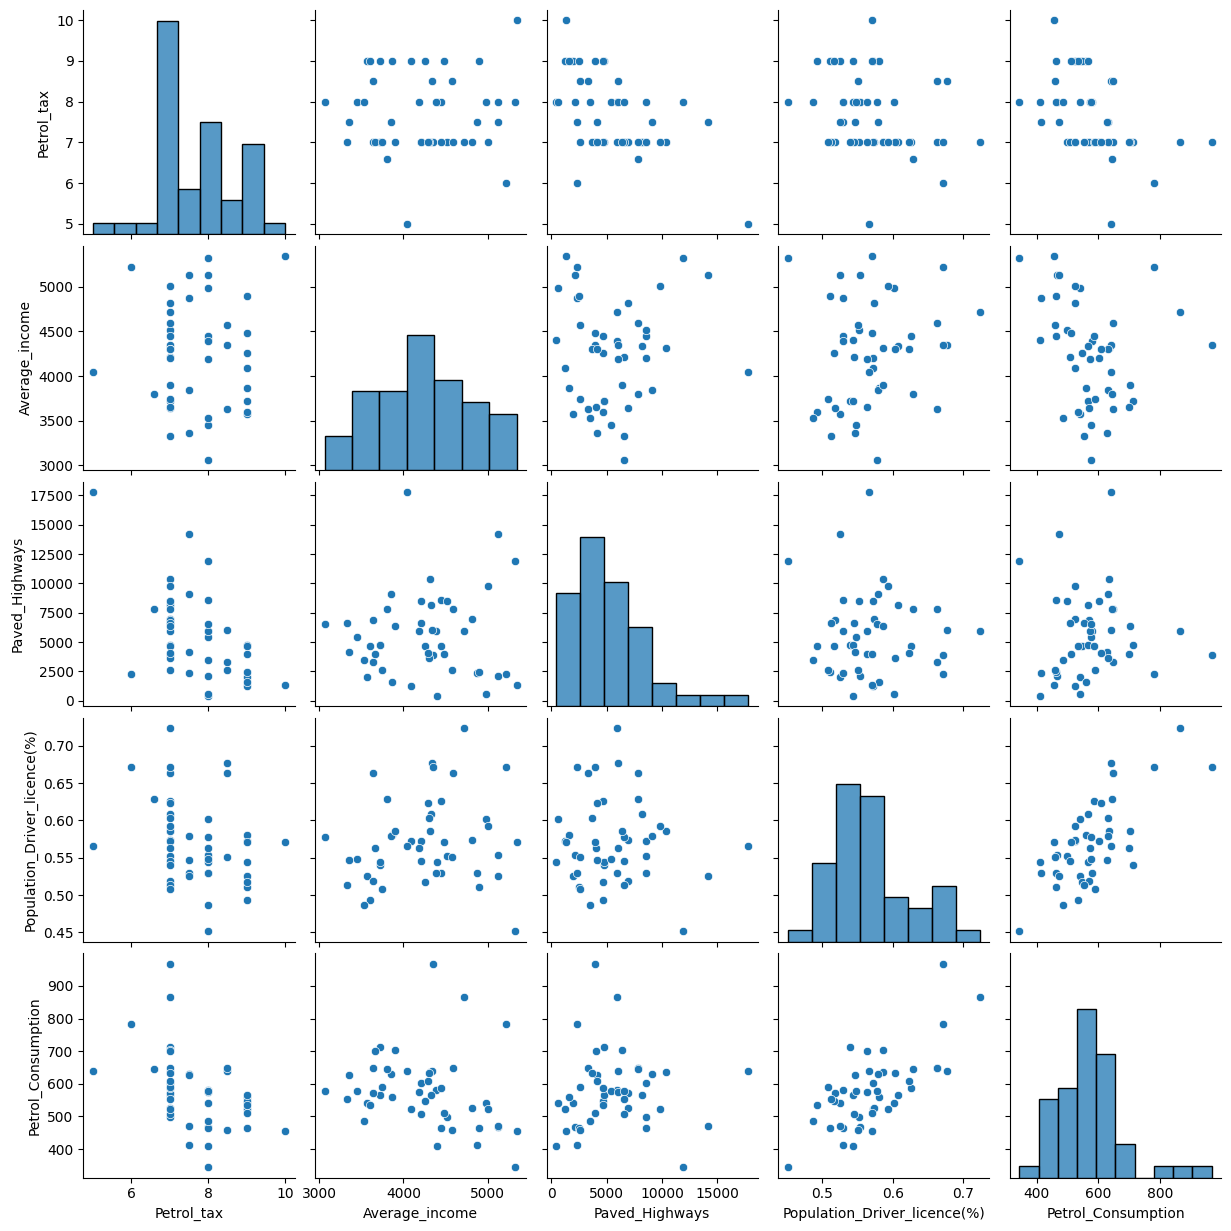

In [6]:
sb.pairplot(df)

In [8]:
corr=df.corr()
corr

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


[Text(0.5, 1.0, 'Теплова карта кореляційних залежностей')]

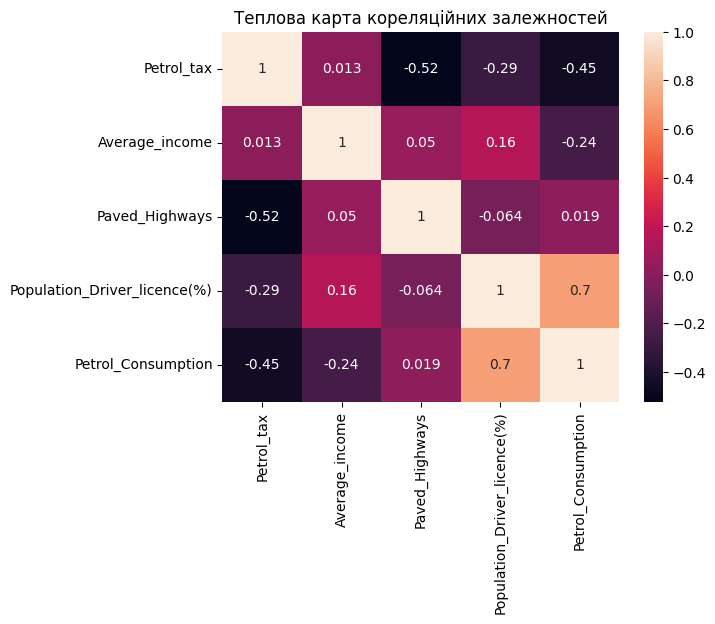

In [10]:
sb.heatmap(corr, annot=True).set(title='Теплова карта кореляційних залежностей')

#### Побудуємо графіки лінійних регресій параметрів виборки  від споживання бензину (Petrol_Consumption)

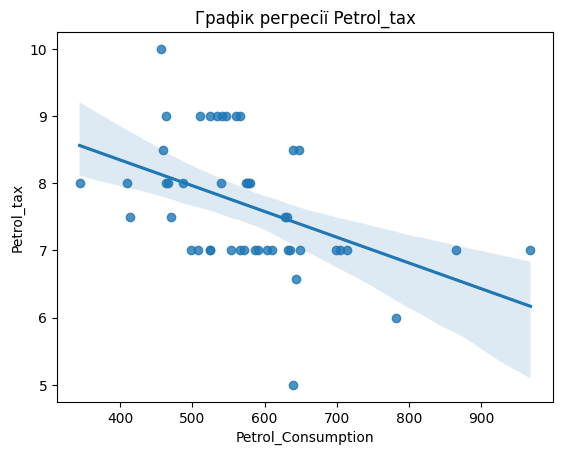

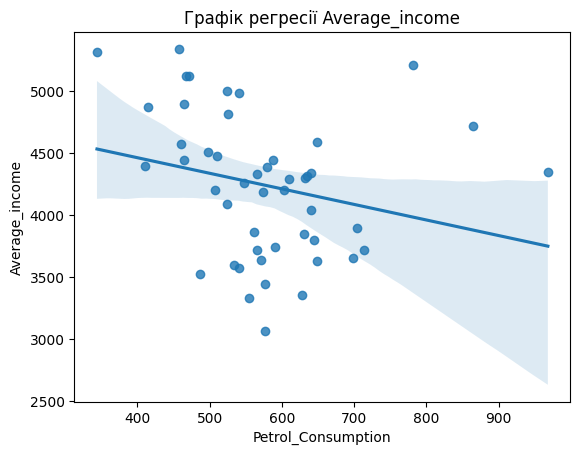

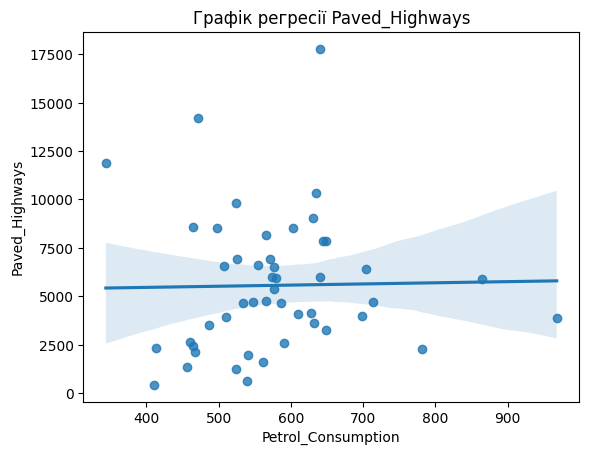

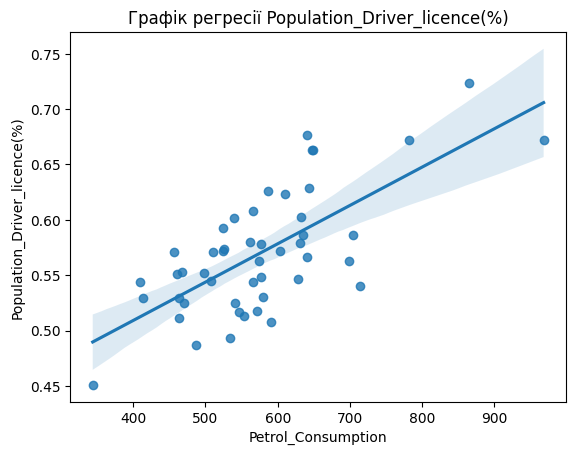

In [12]:
variables = ['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']

for var in variables:
    plt.figure()
    sb.regplot(x='Petrol_Consumption', y=var, data=df).set(title=f'Графік регресії {var}')

In [13]:
enrollment_data = df[variables].values
enrollment_target = df[['Petrol_Consumption']].values
X, y = scale(enrollment_data), enrollment_target

In [15]:
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [33]:
print('intercept: ', model.intercept_)
print('slope: ', model.coef_)
print('Достовірність моделі: Score= {:.4f}'.format(model.score(X, y)))

intercept:  [576.77083333]
slope:  [[-32.7310515  -37.79691223  -8.3813148   73.3569154 ]]
Достовірність моделі: Score= 0.6787


In [26]:
y_pred = model.predict(X)

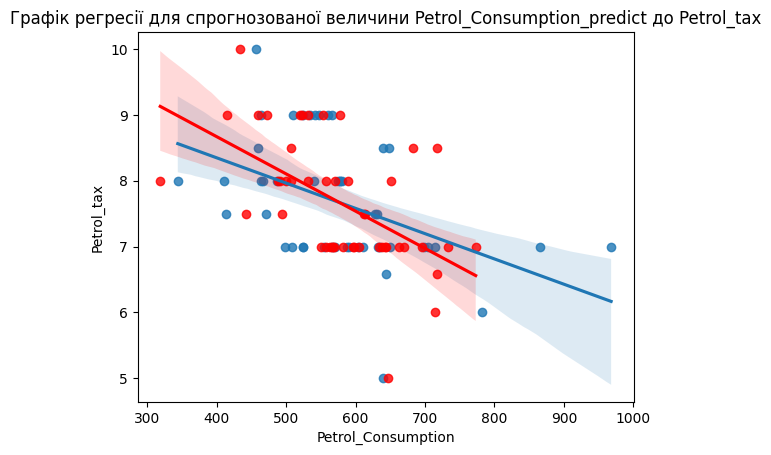

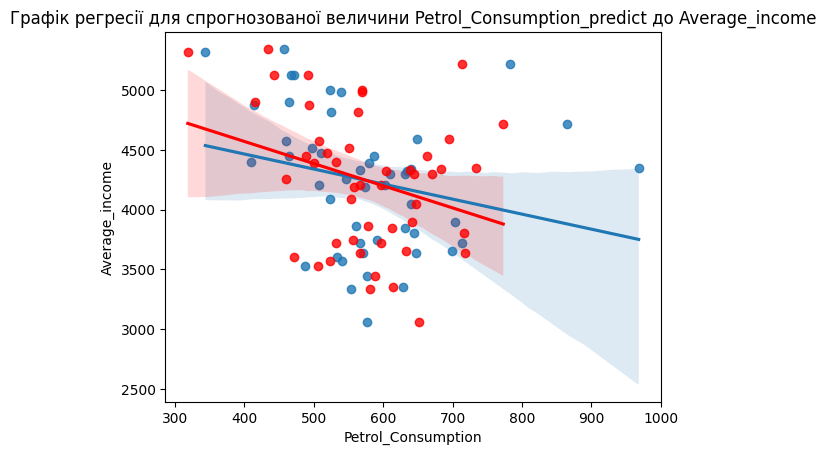

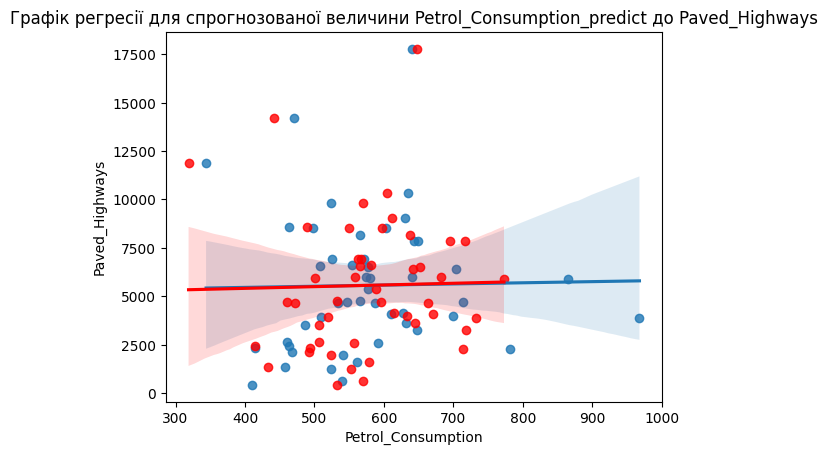

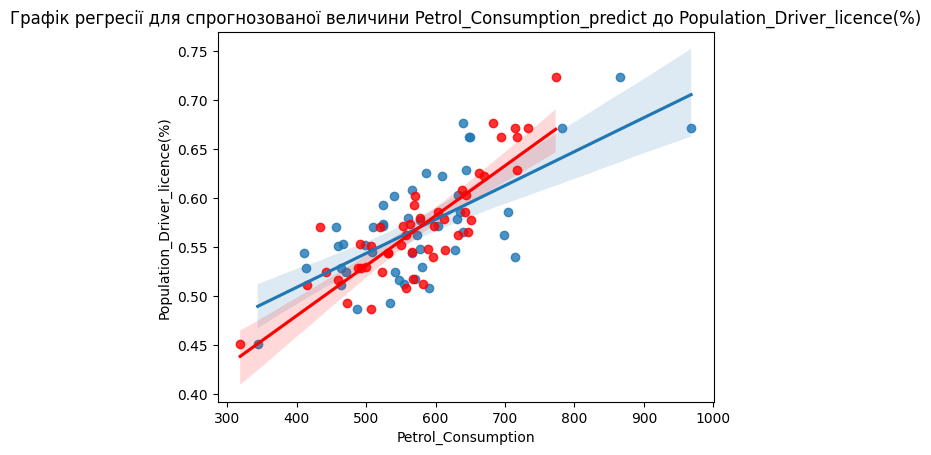

In [45]:
for var in variables:
    plt.figure()
    sb.regplot(x='Petrol_Consumption', y=var, data=df)
    sb.regplot(x=y_pred, y=var, data=df,color='Red').set(title=f'Графік регресії для спрогнозованої величини Petrol_Consumption_predict до {var}')
    

In [44]:
mae=sklearn.metrics.mean_absolute_error(y,y_pred)
mse=sklearn.metrics.mean_squared_error(y,y_pred)
rmse=mse**0.5
print('Mean Absolute Error = {:.4f}'.format(mae))
print('Mean Squared Error = {:.4f}'.format(mse))
print('Root Mean Squared Error = {:.4f}'.format(rmse))


Mean Absolute Error = 48.7775
Mean Squared Error = 3938.5410
Root Mean Squared Error = 62.7578
